In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import os.path
import numpy as np
import datetime
import os
import geopy
import folium
import sklearn
from scipy import stats
from sklearn.metrics import confusion_matrix
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn import metrics
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

In [2]:
gdf = gpd.read_file("gdf_all_data.geojson") 
df = pd.read_csv("all_data.csv")

f_df = pd.read_csv("features.csv")

In [4]:
#gdf_user1 = gdf[gdf['User'] == 'User1']
#gdf_user2 = gdf[gdf['User'] == 'User2']
##gdf.tripNr.unique()
#gdf_user1
f_df

,Unnamed: 0,tripNr,mode,total_distance_m,total_duration_s,vel_corr_mean,vel_mean,acc_mean,acc_max,vel_max
0,0,140617.000,Run,655.607087,241.889990,9.618836,9.618836,-0.046969,0.882482,11.800649
1,1,140617.001,Walking,257.166103,193.629993,4.687925,4.687925,-0.046503,0.937395,7.58146
2,2,140617.002,Run,741.798973,275.979984,9.768308,9.768308,-0.036079,2.292924,12.461575
3,3,140617.003,Walking,227.277619,165.599995,4.735657,4.735657,-0.196217,0.261479,6.100149
4,4,140617.004,Run,786.320733,285.019987,9.609419,9.609419,0.000973,1.596341,12.942976
...,...,...,...,...,...,...,...,...,...,...
147,147,270617.015,Still,93.691111,403.229980,0.811631,0.811631,-0.016170,1.369844,2.503797
148,148,270617.016,Train,4998.601243,418.959975,37.225763,37.225763,-0.068759,3.087619,124.792952
149,149,270617.017,Bike,1915.268821,550.479969,13.210243,13.210243,-0.066535,2.868154,28.631847
150,150,270617.018,Still,102.141693,106.629994,2.322997,2.322997,-0.227069,0.717635,17.210074


In [5]:
f_df['vel_max']=None
a = gdf.groupby(['tripNr'])[['vel']].max()
k=-1
for i in f_df["tripNr"]:
    k+=1
    for j in a.index:
        if i == j:
            f_df.iloc[k,9] = a.loc[j,"vel"]
f_df=f_df.iloc[0:152,:]
#f_df
#a.to_csv("C:/Users/12448/Desktop/test.csv", index=False,header=True)

In [6]:
def calculate_relative_positive_acceleration(acceleration, speed, time_step, distance):

    if len(distance) != len(speed) != len(acceleration) != len(time_step):
        return np.nan
    else:
        # initialize rpa
        rpa_sum = 0
        # calculate total distance
        total_distance = distance*1000
        # loop distance
        for i in range(0, len(acceleration) - 1):
            if acceleration[i] > 0:
                rpa_sum += (time_step[i] * speed[i] * acceleration[i])
        # scale to total distance
        rpa = rpa_sum / total_distance
        return rpa

In [7]:
f_df["RPA"]=calculate_relative_positive_acceleration(f_df["acc_max"], f_df["vel_mean"], f_df["total_duration_s"], f_df["total_distance_m"])
#f_df

/var/folders/76/lcc4bmsd7zs6xhynfb87k3v40000gn/T/ipykernel_56216/3814332076.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  f_df["RPA"]=calculate_relative_positive_acceleration(f_df["acc_max"], f_df["vel_mean"], f_df["total_duration_s"], f_df["total_distance_m"])


## Es gibt 5 Merkmale. Folgende ist die Vertilung jeweils.

/var/folders/76/lcc4bmsd7zs6xhynfb87k3v40000gn/T/ipykernel_56216/2343369539.py:17: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


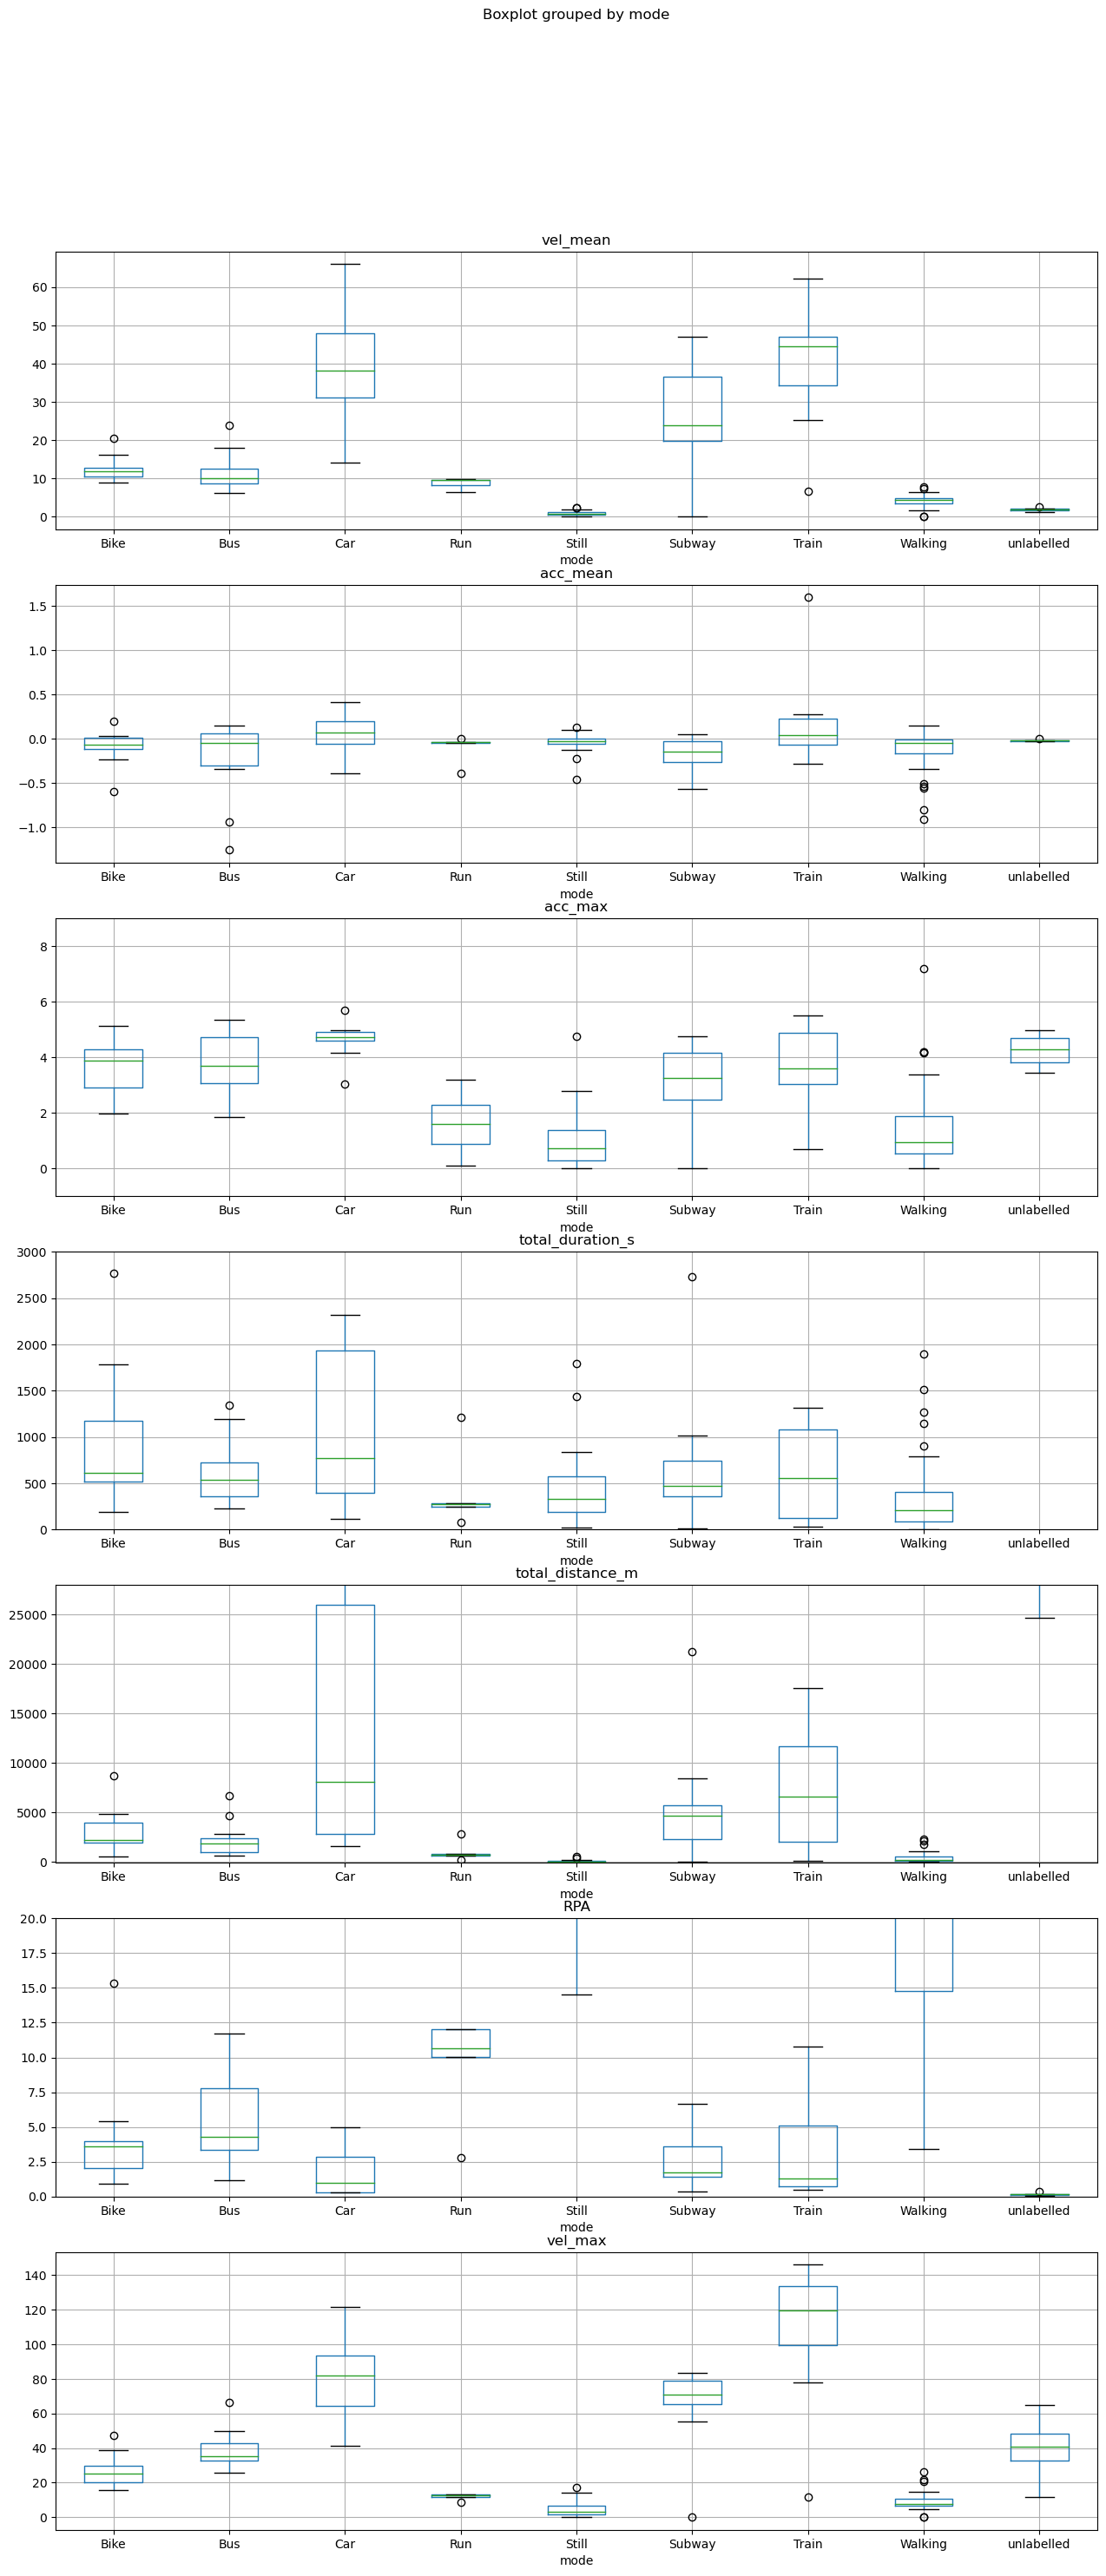

In [8]:
fig,ax = plt.subplots(7,1,figsize=(15,35))

f_df.boxplot(column='vel_mean',by='mode',ax=ax[0])

f_df.boxplot(column='acc_mean',by='mode',ax=ax[1])

f_df.boxplot(column='acc_max',by='mode',ax=ax[2])

f_df.boxplot(column='total_duration_s',by='mode',ax=ax[3])
ax[3].set_ylim(0, 3000)
f_df.boxplot(column='total_distance_m',by='mode',ax=ax[4])
ax[4].set_ylim(-100, 28000)
f_df.boxplot(column="RPA",by='mode',ax=ax[5])
f_df.boxplot(column="vel_max",by='mode',ax=ax[6])
ax[2].set_ylim(-1, 9)
ax[5].set_ylim(0, 20)
fig.show()

In [25]:
gdf = gdf.dropna()
gdf

,datetime,time,oriW,oriX,oriY,oriZ,LaccX,LaccY,LaccZ,pressure,...,mode,tripNr,User,recid,d_dist,d_time,vel,acc,vel_corr,geometry
1,2017-06-22T08:46:46.619999,1.498121e+12,0.711295,0.667593,-0.021792,0.218854,0.164321,6.407377,-1.372446,1005.113749,...,unlabelled,220617.02,User1,220617,2.664046,3.229999,2.969217,0.285415,2.969217,POINT (50.84696 -0.13339)
3,2017-06-22T08:46:53.430000,1.498121e+12,0.717173,0.672209,-0.103821,0.151705,-0.670852,-4.799349,-0.619527,1005.110957,...,Walking,220617.00,User1,220617,1.026499,1.000000,3.695396,7.181507,3.695396,POINT (50.84689 -0.13338)
4,2017-06-22T08:46:57.439999,1.498121e+12,0.729197,0.662254,-0.089967,0.146949,-1.006420,-2.853471,0.186316,1005.147842,...,Walking,220617.00,User1,220617,12.115659,4.009999,10.876903,-1.129117,10.876903,POINT (50.84678 -0.13338)
5,2017-06-22T08:47:03.450000,1.498121e+12,0.731013,0.662975,-0.075235,0.142905,2.077009,-1.596077,-5.836242,1005.188397,...,Walking,220617.00,User1,220617,10.599545,6.009999,6.349146,0.012140,6.349146,POINT (50.84669 -0.13341)
6,2017-06-22T08:47:21.480000,1.498121e+12,0.630252,0.742655,-0.017601,0.225683,-1.098918,-4.058797,0.492881,1005.074037,...,Walking,220617.00,User1,220617,32.164061,18.030000,6.422109,-0.033330,6.422109,POINT (50.84640 -0.13339)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16031,2017-07-18T15:06:15.450000,1.500390e+12,0.996731,-0.006703,-0.001635,-0.080490,-0.042024,-0.027680,0.009800,1011.395730,...,unlabelled,180717.02,User2,180717,9.542395,29.169999,1.177670,-0.002281,1.177670,POINT (51.08274 0.75708)
16032,2017-07-18T15:06:54.470001,1.500390e+12,0.996715,-0.005742,0.000456,-0.080777,-0.000100,-0.010741,-0.000100,1011.402587,...,unlabelled,180717.02,User2,180717,12.043438,39.020000,1.111132,-0.028289,1.111132,POINT (51.08284 0.75704)
16039,2017-07-18T15:08:43.759998,1.500391e+12,0.395932,-0.011232,0.008839,-0.918168,-0.006400,0.011500,0.009258,1011.333291,...,unlabelled,180717.02,User2,180717,1.562757,16.040000,0.350743,-0.017146,0.350743,POINT (51.08305 0.75664)
16040,2017-07-18T15:08:50.810001,1.500391e+12,0.395975,-0.011271,0.008755,-0.918149,0.011910,0.009915,-0.009600,1011.347102,...,unlabelled,180717.02,User2,180717,0.148299,7.049999,0.075727,-0.010741,0.075727,POINT (51.08305 0.75664)


In [26]:
gdf_labeled=gdf[gdf["mode"]!="unlabelled"]
gdf_unlabeled=gdf[gdf["mode"]=="unlabelled"]

In [28]:
df_labeled=f_df[f_df["mode"]!="unlabelled"]
df_unlabeled=f_df[f_df["mode"]=="unlabelled"]
df_labeled,df_unlabeled

(     Unnamed: 0      tripNr     mode  total_distance_m  total_duration_s  \
 0             0  140617.000      Run        655.607087        241.889990   
 1             1  140617.001  Walking        257.166103        193.629993   
 2             2  140617.002      Run        741.798973        275.979984   
 3             3  140617.003  Walking        227.277619        165.599995   
 4             4  140617.004      Run        786.320733        285.019987   
 ..          ...         ...      ...               ...               ...   
 146         146  270617.014    Train       2473.872693        158.289991   
 147         147  270617.015    Still         93.691111        403.229980   
 148         148  270617.016    Train       4998.601243        418.959975   
 149         149  270617.017     Bike       1915.268821        550.479969   
 150         150  270617.018    Still        102.141693        106.629994   
 
      vel_corr_mean   vel_mean  acc_mean    acc_max     vel_max        RPA

In [93]:
df_labeled[suitable_features]

,vel_mean,acc_mean,acc_max,total_duration_s,total_distance_m,vel_max,RPA
0,9.618836,-0.046969,0.882482,241.889990,655.607087,11.800649,12.057142
1,4.687925,-0.046503,0.937395,193.629993,257.166103,7.58146,30.737906
2,9.768308,-0.036079,2.292924,275.979984,741.798973,12.461575,10.656185
3,4.735657,-0.196217,0.261479,165.599995,227.277619,6.100149,34.780140
4,9.609419,0.000973,1.596341,285.019987,786.320733,12.942976,10.052828
...,...,...,...,...,...,...,...
146,62.301279,1.591402,22.050464,158.289991,2473.872693,114.32902,3.195293
147,0.811631,-0.016170,1.369844,403.229980,93.691111,2.503797,84.370303
148,37.225763,-0.068759,3.087619,418.959975,4998.601243,124.792952,1.581392
149,13.210243,-0.066535,2.868154,550.479969,1915.268821,28.631847,4.127226


In [29]:
suitable_features = ['vel_mean', 'acc_mean', 'acc_max', 'total_duration_s', 'total_distance_m',"vel_max", "RPA"]
X = df_labeled[suitable_features]
X = X.values
y = df_labeled['mode']
y = y.values

## convert 'mode' to numbers ( maybe not must)

In [30]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(y)
#LabelEncoder()
#le.transform(y)
#df['EncodedSpecies'] = le.transform(y)
#y = df['EncodedSpecies']
y = le.transform(y)

# train / test split

In [55]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score



#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)
X_train, X_test, y_train, y_test = train_test_split(X, y)

print(X_train.shape)
print(X_test.shape)
print(y_train)
print(y_test)

(109, 7)
(37, 7)
[3 3 0 4 1 2 7 1 4 2 0 5 7 7 6 4 6 7 7 7 7 5 7 4 4 2 4 1 7 1 6 7 7 7 1 7 7
 0 4 7 7 7 1 0 2 4 7 7 5 7 7 6 1 6 5 0 5 4 7 6 7 2 4 6 7 7 5 5 4 7 7 7 2 2
 7 7 5 7 2 0 6 7 4 1 3 3 7 0 1 2 7 4 4 2 7 4 2 2 4 5 1 4 7 2 5 7 4 7 1]
[7 4 7 0 1 7 1 2 0 7 7 3 7 7 7 1 7 7 7 1 1 0 0 7 2 7 7 1 4 4 7 7 7 4 4 7 4]


## KNN

In [59]:
from sklearn.neighbors import KNeighborsClassifier

# Pick a value for K.

K = 5

# create an instance of Neighbours Classifier and fit the data / train the model

knn = KNeighborsClassifier(n_neighbors = K)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [60]:
y_knn = knn.predict(X_test)
knn_score = metrics.accuracy_score(y_test, y_knn)
knn_score

/Users/lepeng/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.7567567567567568

/Users/lepeng/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/lepeng/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer

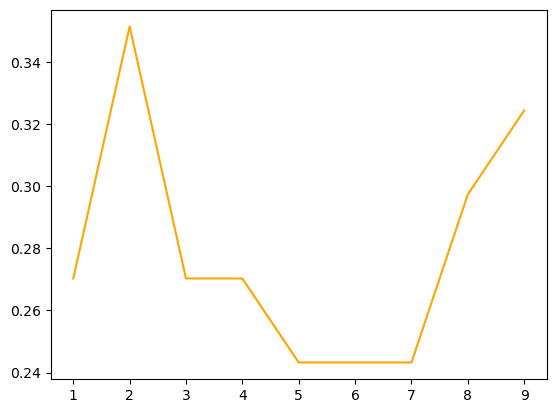

In [58]:
v=[]
k_range = range(1,10)
for k in k_range:
    neighx = KNeighborsClassifier(n_neighbors = k)
    neighx.fit(X_train,y_train)
    pred_k = neighx.predict(X_test)
    v.append(np.mean(pred_k != y_test))
plt.plot(k_range,v,c='Orange',)
plt.show()

## logistic regression

In [61]:
# import the class
from sklearn.linear_model import LogisticRegression


# instantiate the model (using the default parameters)

logreg = LogisticRegression(random_state=16)


logreg.fit(X_train, y_train)

y_logreg = logreg.predict(X_test)
logreg_score = metrics.accuracy_score(y_test, y_logreg)
logreg_score

/Users/lepeng/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8108108108108109

## decision tree classifier

In [62]:
#from sklearn.naive_bayes import GaussianNB
#nb = GaussianNB()
#nb.fit(X_train,y_train)
##score = clf_gnb.score(X_test, y_test)
##scores = cross_val_score(clf_gnb, X,y, cv=5)
##gnb_score = scores.mean()
##display(gnb_score)
#y_nb = nb.predict(X_test)
#nb_score = metrics.accuracy_score(y_test, y_nb)
#nb_score
##0.6857471264367817
from sklearn import tree
dtc = tree.DecisionTreeClassifier()
dtc = dtc.fit(X_train, y_train)
y_dtc = dtc.predict(X_test)
dtc_score = metrics.accuracy_score(y_test, y_dtc)
dtc_score

0.7837837837837838

## SVC

In [63]:
from sklearn.svm import SVC
svc = SVC(max_iter=10e7, C=100000)
svc.fit(X_train,y_train)
#score = clf_lsvc.score(X_test, y_test)
#scores = cross_val_score(clf_lsvc, X,y, cv=5)
#clf_lsvc.fit(X_train,y_train)
#lsvc_score = scores.mean()
#display(lsvc_score)
y_svc = svc.predict(X_test)
svc_score = metrics.accuracy_score(y_test, y_svc)
svc_score
#0.6848275862068965

0.8918918918918919

## MLP

In [64]:
from sklearn.neural_network import MLPClassifier
#mlp = MLPClassifier(solver='adam', alpha=1e-4, tol=1e-8,hidden_layer_sizes=(32, 32, 32, 32, 32, 32), max_iter=100000, random_state=32)
mlp = MLPClassifier(solver='lbfgs',  alpha=1e-4,hidden_layer_sizes=(32, 32, 64, 32, 32), max_iter=1000000,random_state=20)
mlp.fit(X_train, y_train)
#display(clf_nn.n_iter_)
#score = clf_nn.score(X_test, y_test)
#scores = cross_val_score(clf_nn, X,y, cv=5)
#nn_score = scores.mean()
#display(nn_score)
y_mlp = mlp.predict(X_test)
mlp_score = metrics.accuracy_score(y_test, y_mlp)
mlp_score

0.8378378378378378

## adaboost

In [65]:
from sklearn.ensemble import AdaBoostClassifier
# 4 100
ada = AdaBoostClassifier(base_estimator=sklearn.tree.DecisionTreeClassifier(max_depth=4),n_estimators=1000, random_state=42)
ada.fit(X_train,y_train)
y_ada = ada.predict(X_test)
ada_score = metrics.accuracy_score(y_test, y_ada)
ada_score
#score = sklearn.metrics.accuracy_score(y_test, y_hat)
#score = clf_ada.score(X_test, y_test)
#scores = cross_val_score(clf_ada, X,y, cv=5)
#ada_score = scores.mean()
#display(ada_score)
#0.7875862068965517

0.8378378378378378

## confusion matirx calculation

In [102]:
#modes_cal = ['Bike', 'Bus', 'Car', 'Run', 'Still', 'Subway', 'Train', 'Walking']
confusion_ada = confusion_matrix(y_test, y_ada) #0.8918918918918919
confusion_dtc = confusion_matrix(y_test, y_dtc) #0.8648648648648649
confusion_knn = confusion_matrix(y_test, y_knn) #0.7837837837837838
confusion_logreg = confusion_matrix(y_test, y_logreg) #0.8378378378378378
confusion_mlp = confusion_matrix(y_test, y_mlp) #0.8378378378378378
#confusion_nb = confusion_matrix(y_test, y_nb)
confusion_svc = confusion_matrix(y_test, y_svc) #0.8378378378378378


/Users/lepeng/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/var/folders/76/lcc4bmsd7zs6xhynfb87k3v40000gn/T/ipykernel_56216/1140373341.py:32: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


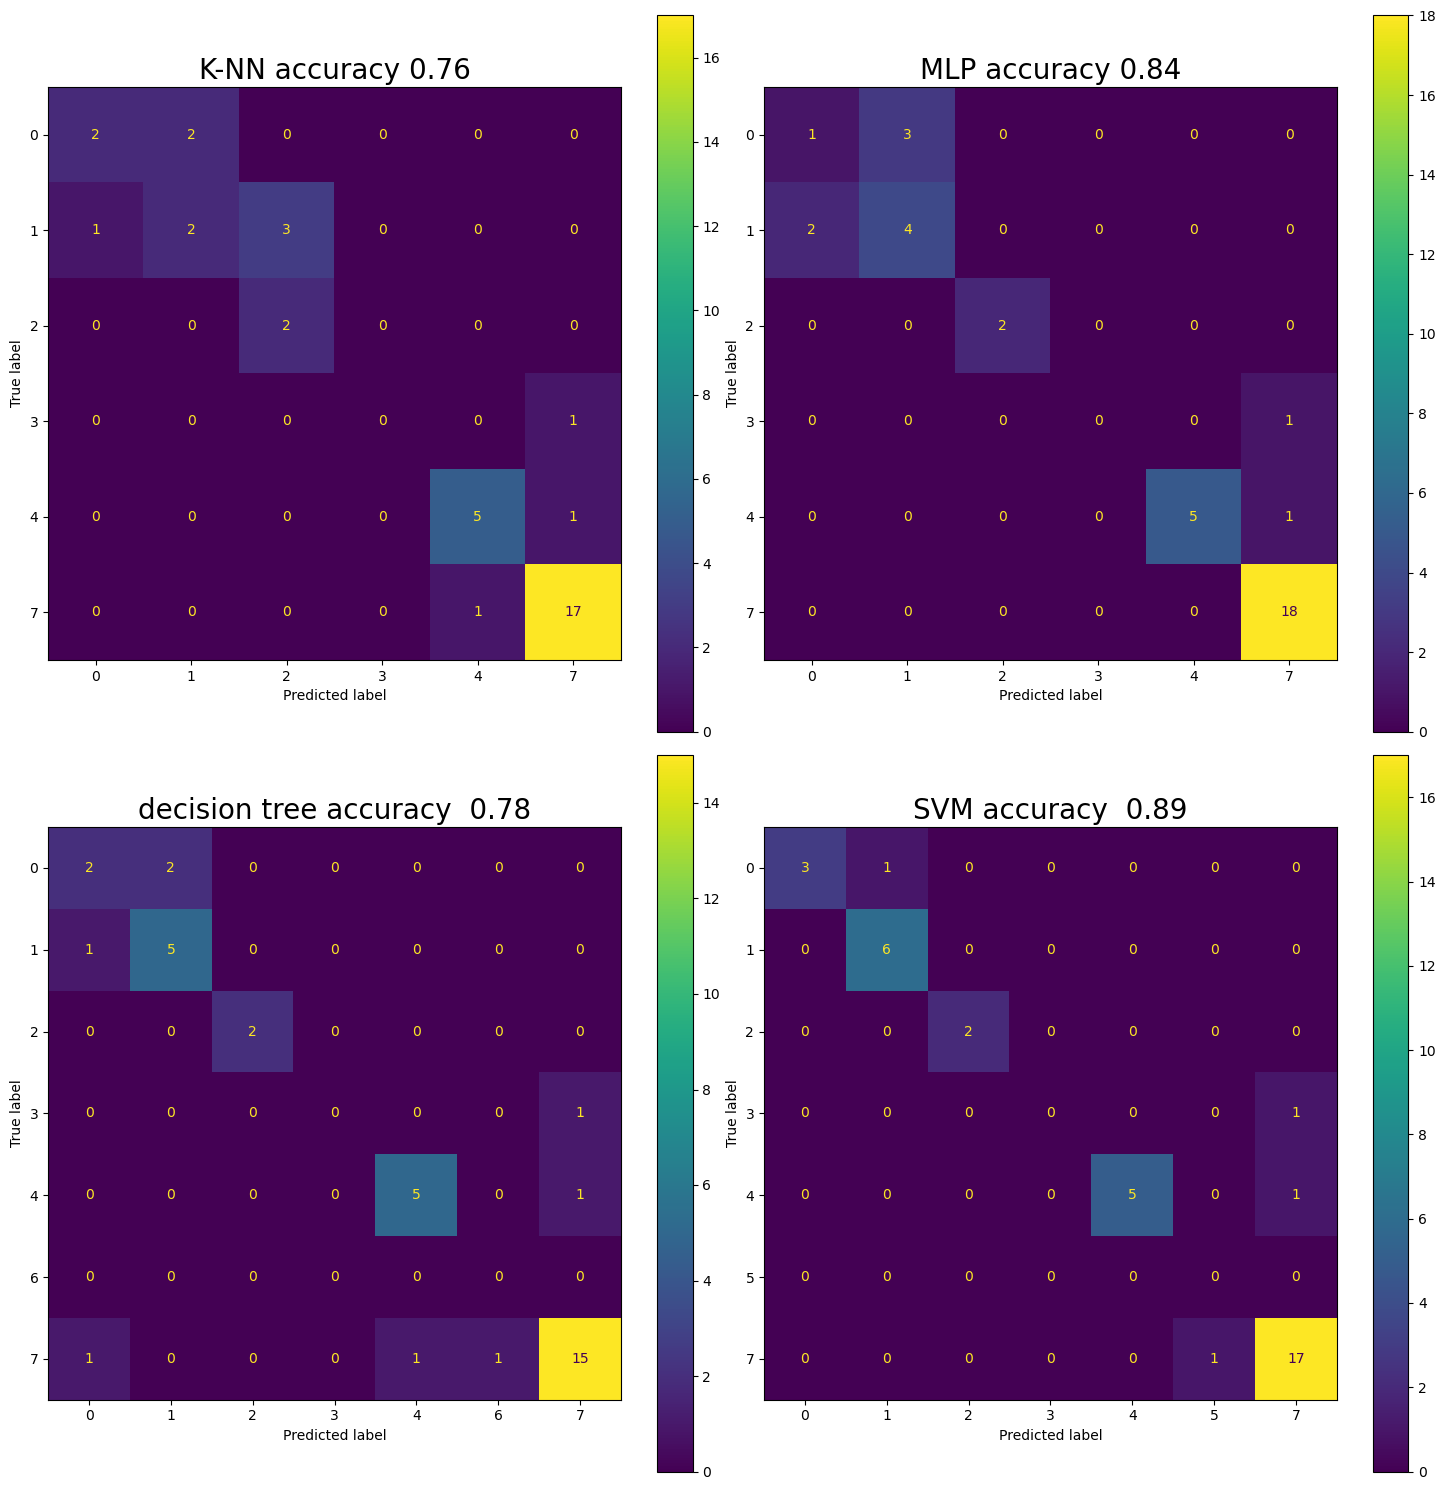

In [111]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
fig,ax = plt.subplots(2,2,figsize=(15,15))

#sklearn.metrics.plot_confusion_matrix(ada, X_test, y_test, ax=ax[0,0])
#sklearn.metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_ada, ax_ = ax[0,0])
#ax[0,0].set_title('AdaBoost  ' + str(np.round(ada_score,4)))

#sklearn.metrics.plot_confusion_matrix(knn, X_test, y_test, ax=ax[0,0])
ConfusionMatrixDisplay.from_estimator(knn, X_test, y_test, ax=ax[0,0])
ax[0,0].set_title('K-NN accuracy ' + str(np.round(knn_score,2)),fontsize=20)

#sklearn.metrics.plot_confusion_matrix(mlp, X_test, y_test, ax=ax[0,1])
#ax[0,1].set_title('MLP  ' + str(np.round(mlp_score,4)))
#sklearn.metrics.plot_confusion_matrix(logreg, X_test, y_test, ax=ax[1,0])
#ax[1,0].set_title('logistic regression  ' + str(np.round(logreg_score,4)))

ConfusionMatrixDisplay.from_estimator(logreg, X_test, y_test, ax=ax[0,1])
ax[0,1].set_title('MLP accuracy ' + str(np.round(mlp_score,2)),fontsize=20)

ConfusionMatrixDisplay.from_estimator(dtc, X_test, y_test, ax=ax[1,0])
ax[1,0].set_title('decision tree accuracy  ' + str(np.round(dtc_score,2)),fontsize=20)

ConfusionMatrixDisplay.from_estimator(svc, X_test, y_test, ax=ax[1,1])
ax[1,1].set_title('SVM accuracy  ' + str(np.round(svc_score,2)),fontsize=20)



#sklearn.metrics.plot_confusion_matrix(heigh, X_test, y_test, ax=ax[1,1])
#ax[2,1].set_title('K-NN  ' + str(np.round(knn_score,4)))
fig.tight_layout()
plt.subplots_adjust(wspace =0)
fig.show()

In [68]:
#modes_cal = ['Bike', 'Bus', 'Car', 'Run', 'Still', 'Subway', 'Train', 'Walking']

## calculate precision recall and specificity

In [71]:
def calc_prec_rec_spec(tn, fp ,fn ,tp):
    if tp+fp != 0:
        precision = tp/(tp+fp)
    else:
        precision = 0.0
        
    if tp+fn != 0:
        recall = tp/(tp+fn)
    else:
        recall = 0.0
        
    if tn+fp != 0:
        specificity = tn/(tn+fp)
    else:
        specificity = 0.0
    
    precision = round(precision,2)
    recall = round(recall,2)
    specificity = round(specificity,2)
        
    return precision, recall, specificity

#def extract_tp_tn_fp_fn(conf_matrix, mode, modes):
#    non_mode_cols = [elem for elem in modes if elem != mode]
#    
#    pos_ser = conf_matrix.loc[:, mode]
#    neg_df = conf_matrix.loc[:, non_mode_cols]
#    
#    tp = pos_ser[mode]
#    
#    fp_ser = pos_ser[non_mode_cols]
#    tn_df = neg_df.loc[non_mode_cols, :]
#    fn_ser = neg_df.loc[mode, :]
#
#    fp = fp_ser.sum()
#    tn = tn_df.sum().sum()
#    fn = fn_ser.sum()
#    return tp, tn, fp, fn
#

def counts_from_confusion(confusion):
    """
    Obtain TP, FN FP, and TN for each class in the confusion matrix
    """

    counts_list = np.zeros([8,4])

    # Iterate through classes and store the counts
    for i in range(confusion.shape[0]):
        tp = confusion[i, i]

        fn_mask = np.zeros(confusion.shape)
        fn_mask[i, :] = 1
        fn_mask[i, i] = 0
        fn = np.sum(np.multiply(confusion, fn_mask))

        fp_mask = np.zeros(confusion.shape)
        fp_mask[:, i] = 1
        fp_mask[i, i] = 0
        fp = np.sum(np.multiply(confusion, fp_mask))

        tn_mask = 1 - (fn_mask + fp_mask)
        tn_mask[i, i] = 0
        tn = np.sum(np.multiply(confusion, tn_mask))
        
        counts_list[i] = [tn, fp ,fn ,tp]
 
    return counts_list

def scores_from_conf(confusiontable):
    cols = ["precision", "recall", "specificity"]
    scores_df = pd.DataFrame(columns=cols, index = modes_cal)
    count_list = counts_from_confusion(confusiontable)
    i = 0
    for mode in modes_cal:
        #curr_tp, curr_tn, curr_fp, curr_fn = extract_tp_tn_fp_fn(conf_matrix, mode, modes)
        tn, fp, fn, tp = count_list[i]
        prec, rec, spec = calc_prec_rec_spec(tn, fp, fn, tp)
        scores_df.loc[mode, cols] = prec, rec, spec
        i = i+1
    
    return scores_df

In [91]:
ada_eva = scores_from_conf(confusion_ada)
ada_eva
#sns.heatmap(ada_eva, cmap='RdYlGn_r', linewidths=0.5, annot=True)


,precision,recall,specificity
Bike,0.75,0.75,0.97
Bus,0.71,0.83,0.94
Car,1.0,1.0,1.0
Run,0.0,0.0,1.0
Still,0.83,0.83,0.97
Subway,0.89,0.89,0.89
Train,0.0,0.0,0.0
Walking,0.0,0.0,0.0


In [108]:
scores_from_conf(confusion_knn)

,precision,recall,specificity
Bike,0.67,0.5,0.97
Bus,0.5,0.33,0.94
Car,0.4,1.0,0.91
Run,0.0,0.0,1.0
Still,0.83,0.83,0.97
Subway,0.89,0.94,0.89
Train,0.0,0.0,0.0
Walking,0.0,0.0,0.0


In [74]:
scores_from_conf(confusion_logreg)

,precision,recall,specificity
Bike,0.33,0.25,0.94
Bus,0.57,0.67,0.9
Car,1.0,1.0,1.0
Run,0.0,0.0,1.0
Still,1.0,0.83,1.0
Subway,0.9,1.0,0.89
Train,0.0,0.0,0.0
Walking,0.0,0.0,0.0


In [109]:
scores_from_conf(confusion_mlp)

,precision,recall,specificity
Bike,0.33,0.25,0.94
Bus,0.71,0.83,0.94
Car,1.0,1.0,1.0
Run,0.0,0.0,0.97
Still,1.0,0.83,1.0
Subway,0.95,1.0,0.95
Train,0.0,0.0,0.0
Walking,0.0,0.0,0.0


In [77]:
#scores_from_conf(confusion_nb)

In [110]:
scores_from_conf(confusion_svc)

,precision,recall,specificity
Bike,1.0,0.75,1.0
Bus,0.86,1.0,0.97
Car,1.0,1.0,1.0
Run,0.0,0.0,1.0
Still,1.0,0.83,1.0
Subway,0.0,0.0,0.97
Train,0.89,0.94,0.89
Walking,0.0,0.0,0.0


In [92]:
dtc_eva = scores_from_conf(confusion_dtc)
#scores_from_conf(confusion_dtc)
dtc_eva

#fig = plt.figure(facecolor='w', edgecolor='k')

,precision,recall,specificity
Bike,0.5,0.5,0.94
Bus,0.71,0.83,0.94
Car,1.0,1.0,1.0
Run,0.0,0.0,1.0
Still,0.83,0.83,0.97
Subway,0.0,0.0,0.97
Train,0.88,0.83,0.89
Walking,0.0,0.0,0.0
